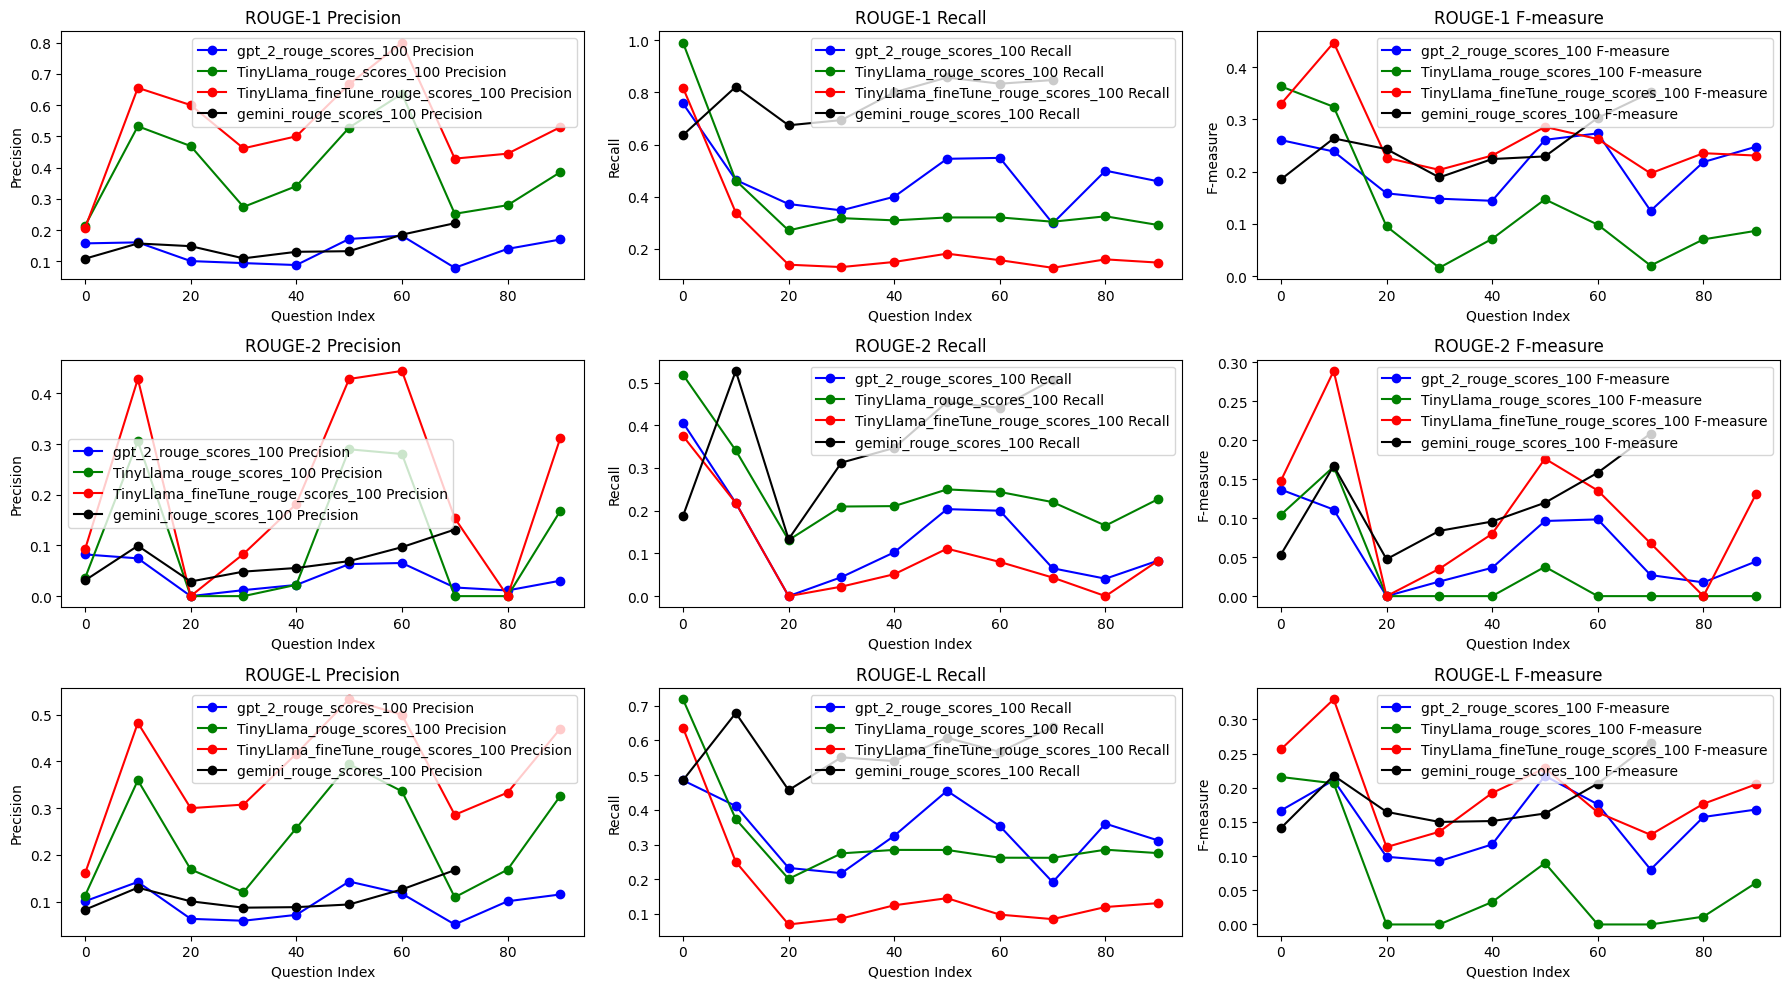

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV files for each model
csv_files = ['gpt_2_rouge_scores_100.csv', 'TinyLlama_rouge_scores_100.csv','TinyLlama_fineTune_rouge_scores_100.csv','gemini_rouge_scores_100.csv']

# Prepare colors for different files
colors = ['blue', 'green','red','black']

# Create subplots outside of the loop
fig, axs = plt.subplots(3, 3, figsize=(18, 10))  # 3 ROUGE types, 3 metrics each

# Sampling interval
interval = 10  # Adjust this based on your dataset size

# Loop over each CSV file
for idx, csv_file in enumerate(csv_files):
    # Load the data from the CSV file
    df = pd.read_csv(csv_file)

    # Subsample the data
    df_sampled = df.iloc[::interval]  # Take every 'interval'-th row

    # Extract ROUGE scores for each model
    precisions_rouge1 = df_sampled['ROUGE-1 Precision']
    recalls_rouge1 = df_sampled['ROUGE-1 Recall']
    fmeasures_rouge1 = df_sampled['ROUGE-1 F-measure']

    precisions_rouge2 = df_sampled['ROUGE-2 Precision']
    recalls_rouge2 = df_sampled['ROUGE-2 Recall']
    fmeasures_rouge2 = df_sampled['ROUGE-2 F-measure']

    precisions_rougeL = df_sampled['ROUGE-L Precision']
    recalls_rougeL = df_sampled['ROUGE-L Recall']
    fmeasures_rougeL = df_sampled['ROUGE-L F-measure']

    # Number of questions (or data points) after sampling
    num_questions = len(precisions_rouge1)

    # Plotting for each file
    for i, (precisions, recalls, fmeasures) in enumerate([(precisions_rouge1, recalls_rouge1, fmeasures_rouge1),
                                                          (precisions_rouge2, recalls_rouge2, fmeasures_rouge2),
                                                          (precisions_rougeL, recalls_rougeL, fmeasures_rougeL)]):
        axs[i, 0].plot(df_sampled.index, precisions, marker='o', color=colors[idx], label=f'{csv_file[:-4]} Precision')
        axs[i, 1].plot(df_sampled.index, recalls, marker='o', color=colors[idx], label=f'{csv_file[:-4]} Recall')
        axs[i, 2].plot(df_sampled.index, fmeasures, marker='o', color=colors[idx], label=f'{csv_file[:-4]} F-measure')

        for j in range(3):
            axs[i, j].set_xlabel('Question Index')
            axs[i, j].set_ylabel(['Precision', 'Recall', 'F-measure'][j])
            axs[i, j].legend()

# Setting titles for subplots
for i, rouge in enumerate(['ROUGE-1', 'ROUGE-2', 'ROUGE-L']):
    axs[i, 0].set_title(f'{rouge} Precision')
    axs[i, 1].set_title(f'{rouge} Recall')
    axs[i, 2].set_title(f'{rouge} F-measure')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()